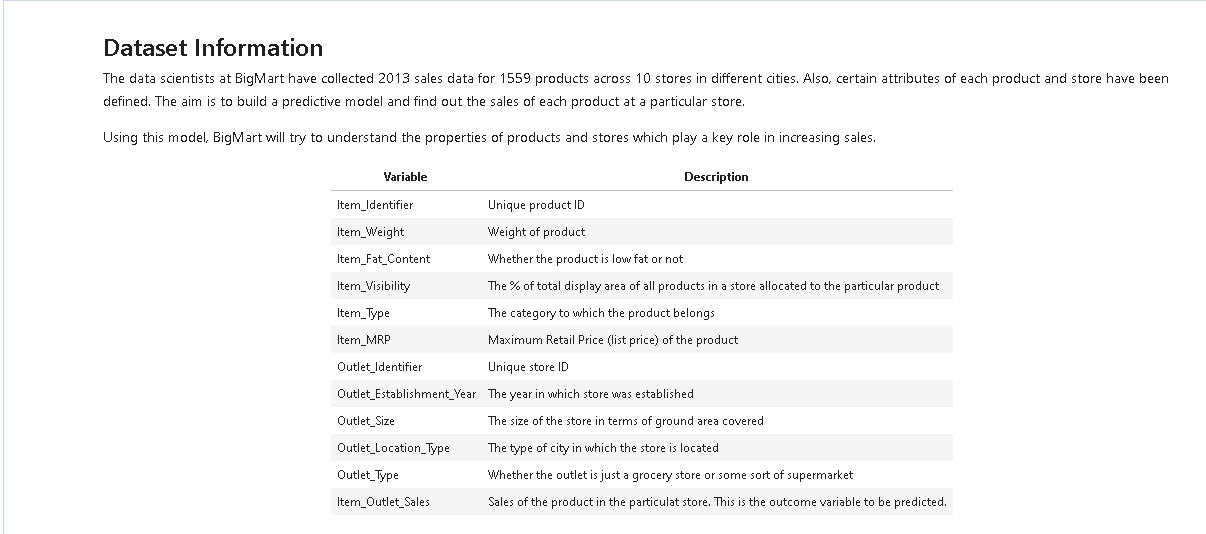

In [1]:
from IPython.display import Image
Image("../imges/data discripe.png")

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
Bigmart = pd .read_csv("../Datasets/Train.csv")
Bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [53]:
Bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [54]:
for i in Bigmart.columns:
    print('{:<30} {:<30}'.format(i,len(Bigmart[i].unique())))

Item_Identifier                1559                          
Item_Weight                    416                           
Item_Fat_Content               5                             
Item_Visibility                7880                          
Item_Type                      16                            
Item_MRP                       5938                          
Outlet_Identifier              10                            
Outlet_Establishment_Year      9                             
Outlet_Size                    4                             
Outlet_Location_Type           3                             
Outlet_Type                    4                             
Item_Outlet_Sales              3493                          


In [55]:
Bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [56]:
Bigmart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [57]:
obj_col=[]
for x in Bigmart.columns:
    if Bigmart.dtypes[x] == 'object':
        obj_col.append(x)
obj_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [58]:
obj_col.remove('Item_Identifier')
obj_col.remove('Outlet_Identifier')
obj_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [59]:
for obj in obj_col:
    print(obj)
    print(Bigmart[obj].value_counts(),"\n")

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64 

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: 

In [60]:
# fill the missing values
item_weight_mean = Bigmart.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [61]:
miss_bool = Bigmart['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [62]:
for i, item in enumerate(Bigmart['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            Bigmart['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            Bigmart['Item_Weight'][i] = np.mean(Bigmart['Item_Weight'])

In [63]:
Bigmart['Item_Weight'].isnull().sum()


0

In [64]:
outlet_size_mode = Bigmart.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [65]:
miss_bool = Bigmart['Outlet_Size'].isnull()
miss_bool

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [66]:
miss_bool = Bigmart['Outlet_Size'].isnull()
Bigmart.loc[miss_bool, 'Outlet_Size'] = Bigmart.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [67]:
Bigmart.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [68]:
sum(Bigmart['Item_Visibility']==0)


526

In [69]:
Bigmart.loc[:, 'Item_Visibility'].replace([0], [Bigmart['Item_Visibility'].mean()], inplace=True)

In [70]:
sum(Bigmart['Item_Visibility']==0)


0

In [71]:
Bigmart['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [72]:
Bigmart['Item_Fat_Content'] = Bigmart['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
Bigmart['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [73]:
Bigmart['New_Item_Type'] = Bigmart['Item_Identifier'].apply(lambda x: x[:2])
Bigmart['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [74]:
Bigmart['New_Item_Type'] = Bigmart['New_Item_Type'].replace({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
Bigmart['New_Item_Type'].value_counts()


Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [75]:
Bigmart.loc[Bigmart['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
Bigmart['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [76]:
Bigmart['Outlet_Years'] = 2022 - Bigmart['Outlet_Establishment_Year']
Bigmart['Outlet_Years']

0       23
1       13
2       23
3       24
4       35
        ..
8518    35
8519    20
8520    18
8521    13
8522    25
Name: Outlet_Years, Length: 8523, dtype: int64

In [77]:
Bigmart.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,23
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,24
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,35


array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:title={'center':'Outlet_Years'}>]], dtype=object)

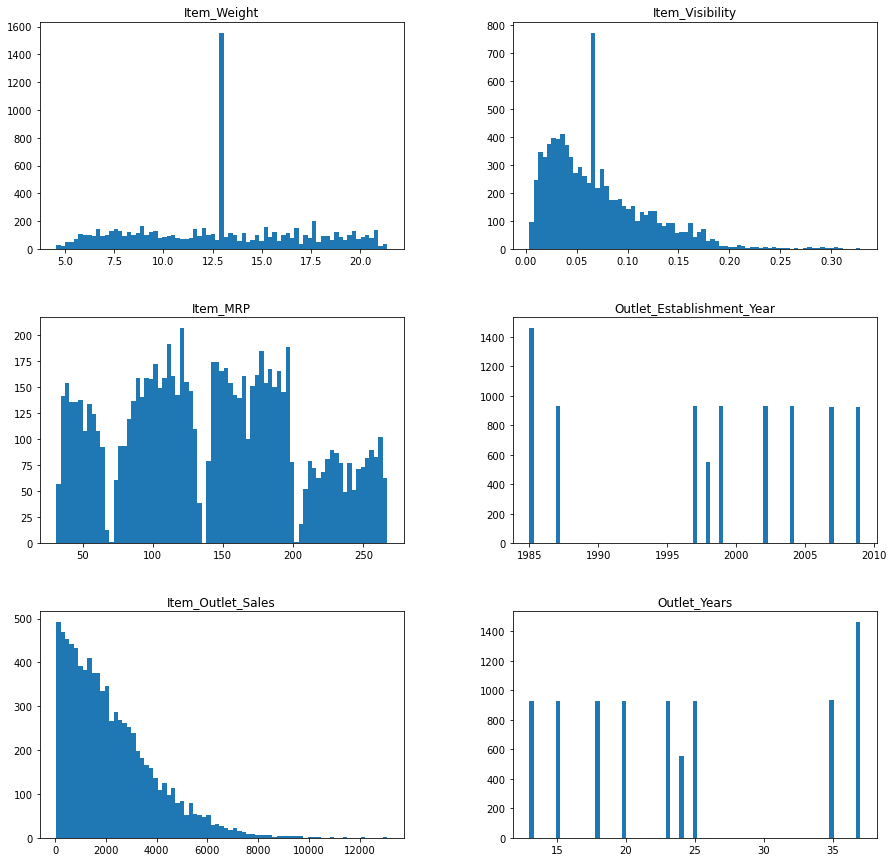

In [78]:
Bigmart.hist(grid=False, figsize=(15, 15), bins=75)

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

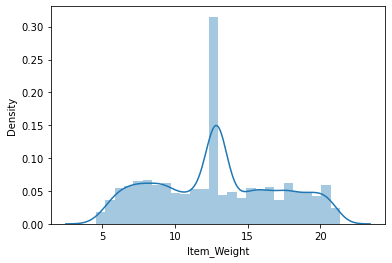

In [27]:
sns.distplot(Bigmart['Item_Weight'])


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

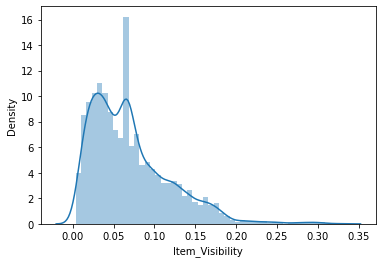

In [28]:
sns.distplot(Bigmart['Item_Visibility'])


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

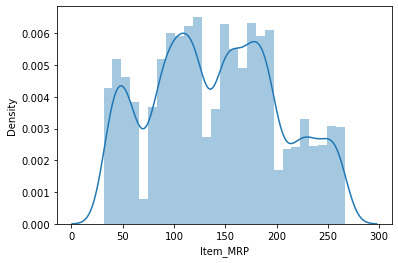

In [29]:
sns.distplot(Bigmart['Item_MRP'])


[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

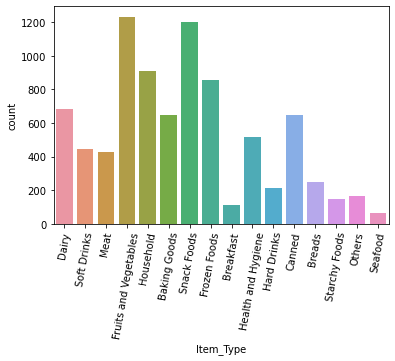

In [5]:
# plt.figure(figsize=(15,5))
l = list(Bigmart['Item_Type'].unique())
chart = sns.countplot(Bigmart["Item_Type"])
chart.set_xticklabels(labels=l, rotation=80)

In [31]:
Bigmart.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.011550,0.008301
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.134138,0.078355
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.567574,-0.005020
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,-0.049135,-1.000000
Item_Outlet_Sales,0.011550,-0.134138,0.567574,-0.049135,1.000000,0.049135
Outlet_Years,0.008301,0.078355,-0.005020,-1.000000,0.049135,1.000000


In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Bigmart['Outlet'] = le.fit_transform(Bigmart['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    Bigmart[col] = le.fit_transform(Bigmart[col])

In [80]:
Bigmart = pd.get_dummies(Bigmart, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
Bigmart.head()


,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3735.1380,23,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,443.4228,13,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,23,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,732.3800,24,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,994.7052,35,1,...,0,0,1,0,1,0,0,0,0,1


In [120]:
X = Bigmart.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = Bigmart['Item_Outlet_Sales']

In [121]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif 
FeatureSelection = SelectPercentile(score_func= f_classif,percentile=70) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
FeatureSelection.fit_transform(X, y)
P = FeatureSelection.get_support()
c = list(X.columns)
for i in range(len(c)):
    print("{:<40}{:<30}".format(c[i],P[i]))

Item_Weight                             0                             
Item_Visibility                         1                             
Item_Type                               1                             
Item_MRP                                1                             
Outlet_Years                            1                             
Outlet                                  1                             
Item_Fat_Content_0                      1                             
Item_Fat_Content_1                      0                             
Item_Fat_Content_2                      1                             
Outlet_Size_0                           0                             
Outlet_Size_1                           1                             
Outlet_Size_2                           1                             
Outlet_Location_Type_0                  0                             
Outlet_Location_Type_1                  1                             
Outlet

In [122]:
X = X.drop(columns=['Outlet_Size_0','Item_Fat_Content_1','Outlet_Type_2',
                    'Outlet_Location_Type_0','Item_Weight',
                    'Outlet_Location_Type_2', 'New_Item_Type_2'])


In [102]:
X.shape

(8523, 15)

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (5710, 15)
X_test shape is  (2813, 15)
y_train shape is  (5710,)
y_test shape is  (2813,)


In [211]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def train(model, X,X1,y,y1):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X1)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print('Reality values Value is :' , list(y1[:5]))
    print('Predicted Value is :  '  , pred[:5])

    print("Model Report")
    print("MAE:",mean_absolute_error(y1,pred))
    print("MSE:",mean_squared_error(y1,pred))
    print("CV Score:", cv_score)

In [212]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model, X_train, X_test, y_train, y_test)


Reality values Value is : [1318.284, 177.7686, 1494.0552, 1246.3776, 1772.3596]
Predicted Value is :   [1586.25486814  987.7796224  1425.26465894 1405.97871678 1321.42896016]
Model Report
MAE: 814.3644961183013
MSE: 1204393.6946082914
CV Score: 1206991.5578254652


In [213]:
from sklearn.svm import SVR
model = SVR(kernel = 'linear')
train(model, X_train, X_test, y_train, y_test)


Reality values Value is : [1318.284, 177.7686, 1494.0552, 1246.3776, 1772.3596]
Predicted Value is :   [1744.92505556  859.28880603 1268.18968069  961.79544192 1238.90228255]
Model Report
MAE: 883.6519459093062
MSE: 1490764.9536183802
CV Score: 1648110.8937452612


In [214]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000,n_jobs=4)
train(model, X_train, X_test, y_train, y_test)


Reality values Value is : [1318.284, 177.7686, 1494.0552, 1246.3776, 1772.3596]
Predicted Value is :   [1125.6933604  812.0715994 1410.0285768 1483.0974636 1261.4053718]
Model Report
MAE: 775.6425372523997
MSE: 1229253.8591214009
CV Score: 1249713.950233258


In [215]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=1000)
train(model, X_train, X_test, y_train, y_test)


Reality values Value is : [1318.284, 177.7686, 1494.0552, 1246.3776, 1772.3596]
Predicted Value is :   [1448.4196068   901.29608787 1243.73031961 1302.1810784  1423.57009885]
Model Report
MAE: 790.5238896739655
MSE: 1249041.6334212585
CV Score: 1439925.6283686433


<AxesSubplot:>

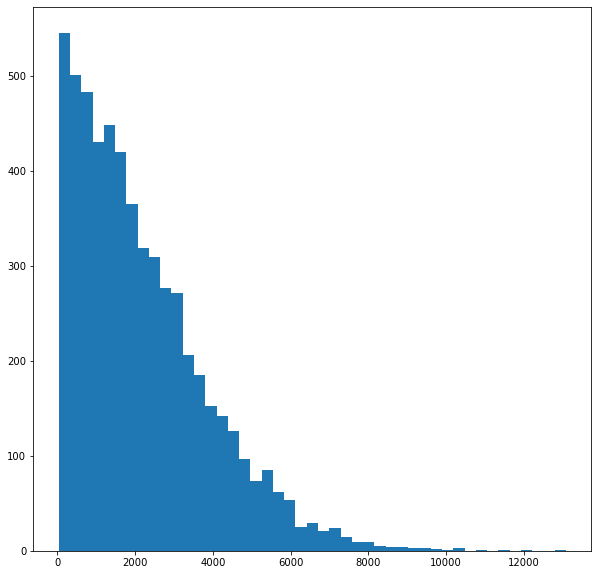

In [216]:
y_train.hist(grid=False, figsize=(10, 10), bins=45)

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)